In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
data = pd.read_excel(r"/content/patan_final.xlsx")

In [ ]:
df = data[['Date','Price']]

In [ ]:
df.shape

(5438, 2)

In [ ]:
df.set_index('Date',inplace=True)

In [ ]:
# Normalize the data
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

In [ ]:
# Create sequences of data
sequence_length = 30 # Adjust as needed
X, y = [], []
for i in range(len(df) - sequence_length - 1):
    X.append(scaled[i:i+sequence_length])
    y.append(scaled[i+sequence_length+1])

In [ ]:
X, y = np.array(X, dtype=np.float32), np.array(y,dtype=np.float32)

In [ ]:
train_size = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4325, 30, 1) (1082, 30, 1) (4325, 1) (1082, 1)


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0379 - val_loss: 0.0040
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.1069e-04 - val_loss: 0.0011
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 8.3663e-04 - val_loss: 0.0010
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7.0309e-04 - val_loss: 7.0504e-04
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7.1624e-04 - val_loss: 6.0354e-04
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7.6849e-04 - val_loss: 5.4783e-04
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 6.3487e-04 - val_loss: 4.6075e-04
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.0391e-04 - val_loss: 4.3309e-04
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.9086e-04 - val_loss: 5.0238e-04
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.2315e-04 - val_loss: 3.9598e-04

In [ ]:
y_pred = model.predict(X_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

In [ ]:
X = np.array(X[-1])

In [ ]:
def pred_n_days(model, data, days):

    predictions = []

    for i in range(days): # Use the days variable here for consistency

        data = data.reshape(30,1)
        data = np.expand_dims(data,axis=0)

        curr_pred = model.predict(data)
        curr_pred = curr_pred.reshape(1,1)
        predictions.append(curr_pred[0])

        curr_pred = np.expand_dims(curr_pred,axis=0)
        data= data[0][1:].reshape((1, 29, 1))
        data = np.concatenate((data,curr_pred),axis=1)

    return np.array(predictions)

In [ ]:
predictions = pred_n_days(model,X,100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

In [ ]:
predictions = scaler.inverse_transform(predictions)

In [ ]:
days1 = np.arange(0,len(y_test))
days2 = np.arange(len(y_test),len(y_test)+100)

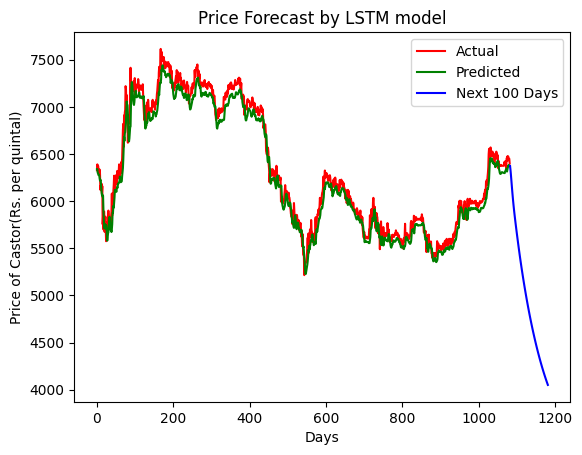

In [43]:
# Visualize the predictions
plt.plot(days1,y_test, color='red',label='Actual')
plt.plot(days1,y_pred,color='green',label='Predicted')
plt.plot(days2,predictions,color='blue',label='Next 100 Days')
plt.title('Price Forecast by LSTM model')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Price of Castor(Rs. per quintal)')
plt.show()

In [42]:
# prompt: calculate mse rmse and rmse percentage in mse

from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
rmse_percentage = (rmse / np.mean(y_test)) * 100

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"RMSE Percentage: {rmse_percentage:.2f}%")

MSE: 13025.904296875
RMSE: 114.13108383291119
RMSE Percentage: 1.80%
